In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
#이미지 불러오는 함수
def load_img():
  blank_img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  #이미지에 글씨 새기기  
  cv2.putText(blank_img,text='ABCDE',org = (50,300), fontFace = font, fontScale=5, color=(255,255,255), thickness=30)
  return blank_img

In [21]:
#이미지 시각화
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

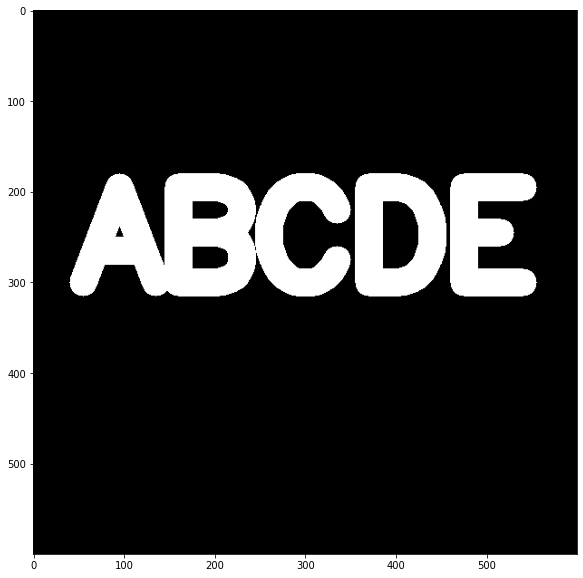

In [26]:
#이미지 불러오기
img = load_img()
display_img(img)

In [71]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# 5 by 5 커널 생성하기
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [28]:
#이미지 경계부분을 침식시켜 배경이미지로 전환되게 됨
# foreground 이미지는 결과적으로 가늘게 된다.
#iteration -> erosion 반복횟수
result = cv2.erode(img, kernel, iterations=4)

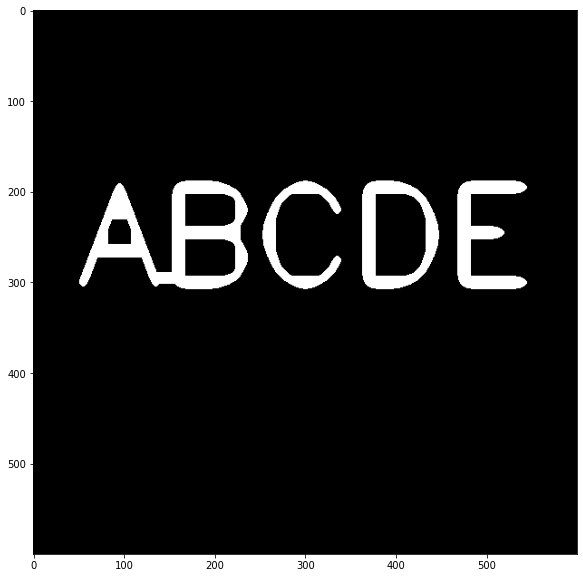

In [29]:
#eroded // 침식
display_img(result)

In [67]:
#dilation 팽창 -> erosion 과 반대로 늘어남
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [68]:
white_noise

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])

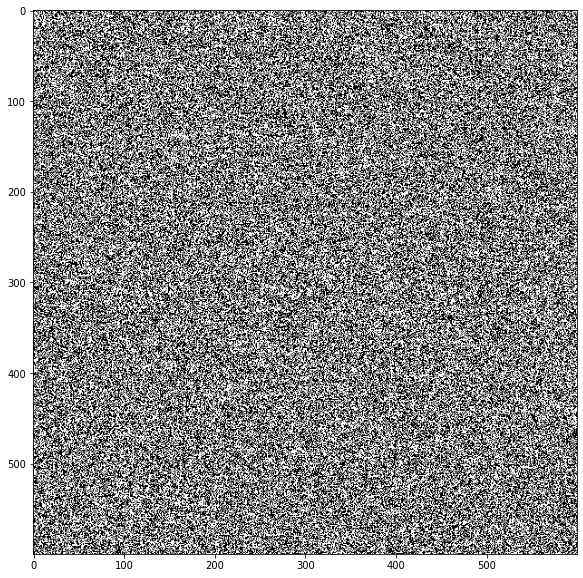

In [69]:
display_img(white_noise)

In [36]:
white_noise = white_noise*255

In [37]:
white_noise

array([[255,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ...,   0, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255,   0, 255, ...,   0, 255,   0],
       [255, 255, 255, ...,   0, 255,   0],
       [  0, 255,   0, ...,   0, 255,   0]])

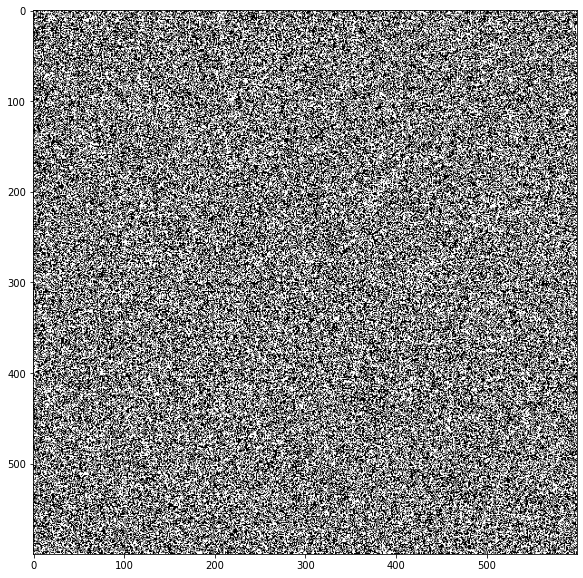

In [38]:
display_img(white_noise)

In [39]:
noise_img = white_noise+img

In [70]:
noise_img

array([[255.,   0.,   0., ..., 255., 255., 255.],
       [255., 255., 255., ...,   0., 255.,   0.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255.,   0., 255., ...,   0., 255.,   0.],
       [255., 255., 255., ...,   0., 255.,   0.],
       [  0., 255.,   0., ...,   0., 255.,   0.]])

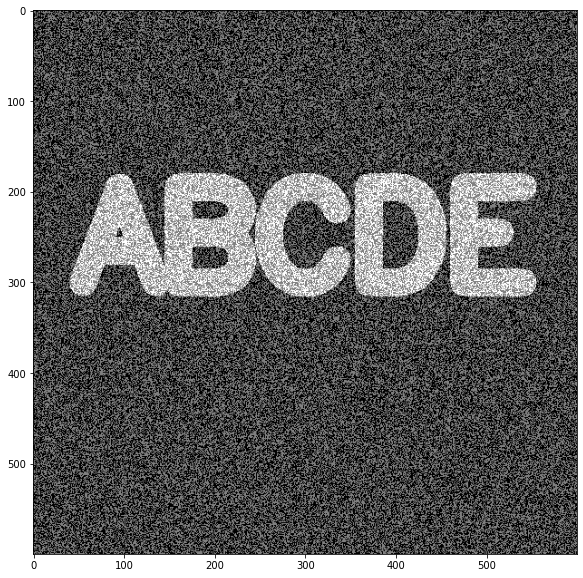

In [40]:
display_img(noise_img)

In [41]:
#erosion 하고 dilation을 적용
#흰색 노이즈를 제거하는데 사용
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

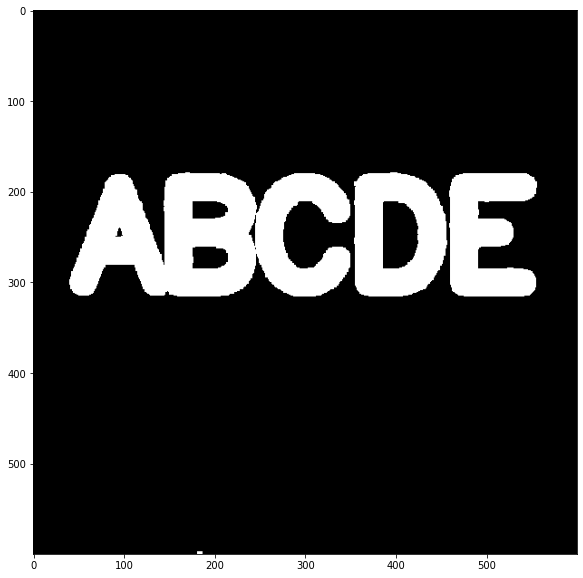

In [42]:
display_img(opening)

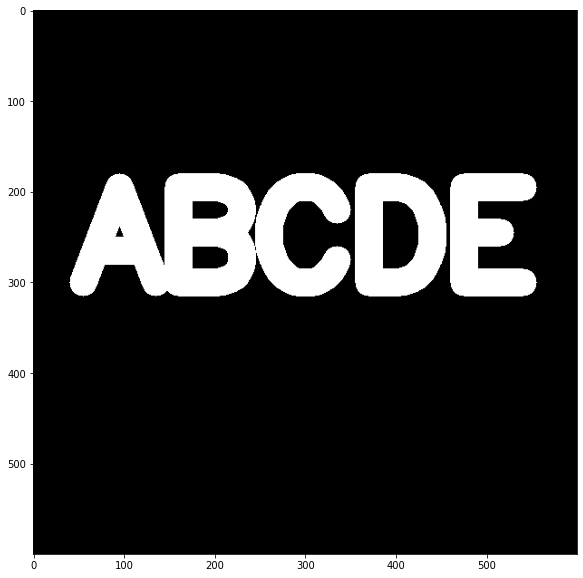

In [43]:
display_img(img)

In [44]:
#background noise 제거에 유용


#foreground noise
img = load_img()

In [47]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))

In [49]:
black_noise = black_noise * -255

In [50]:
black_noise

array([[-255, -255,    0, ...,    0,    0, -255],
       [   0, -255,    0, ..., -255,    0, -255],
       [   0, -255, -255, ...,    0,    0, -255],
       ...,
       [   0, -255, -255, ...,    0,    0, -255],
       [-255,    0, -255, ...,    0,    0,    0],
       [   0, -255,    0, ..., -255, -255,    0]])

In [52]:
black_noise_img = img + black_noise
black_noise_img

array([[-255., -255.,    0., ...,    0.,    0., -255.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       [   0., -255., -255., ...,    0.,    0., -255.],
       ...,
       [   0., -255., -255., ...,    0.,    0., -255.],
       [-255.,    0., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ..., -255., -255.,    0.]])

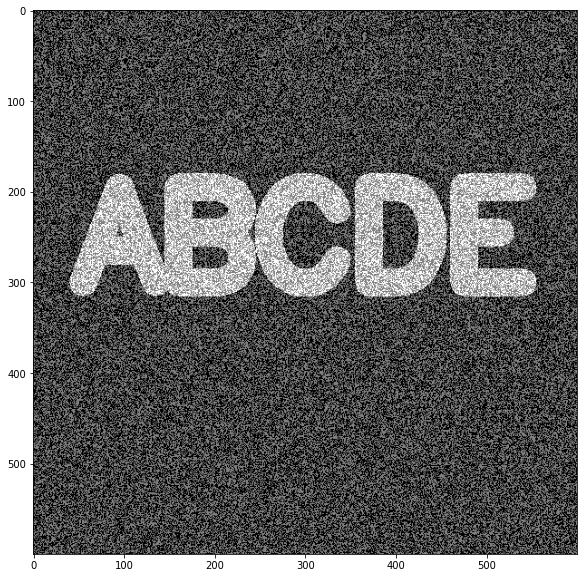

In [53]:
display_img(black_noise_img)

In [54]:
black_noise_img[black_noise_img == -255]=0

In [55]:
black_noise_img.min()

0.0

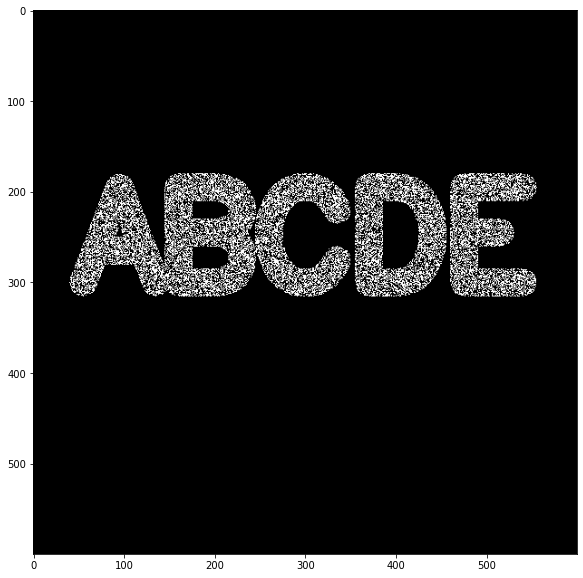

In [56]:
display_img(black_noise_img)

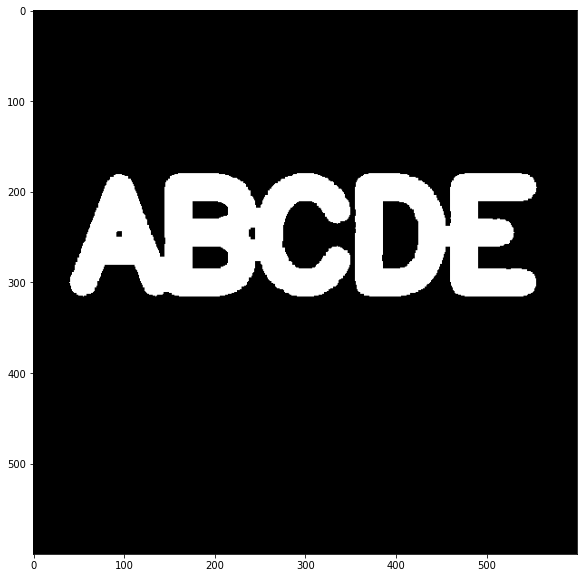

In [57]:
#closing -> dilation 적용 후 erosion
#검은색 제거에 용이하다.
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

In [58]:
#원래 이미지
img = load_img()

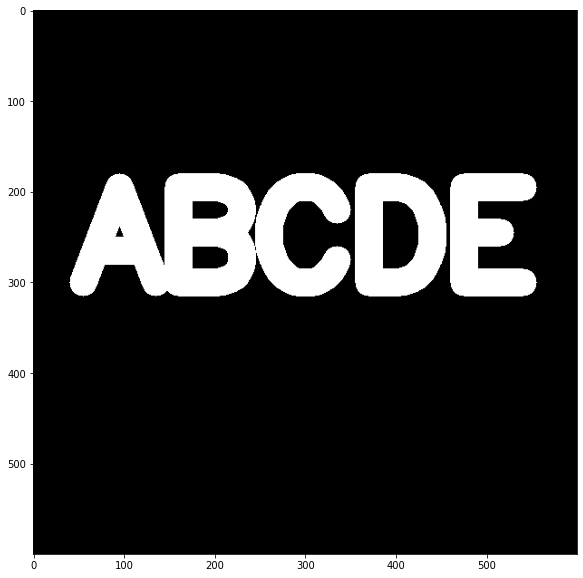

In [59]:
display_img(img)

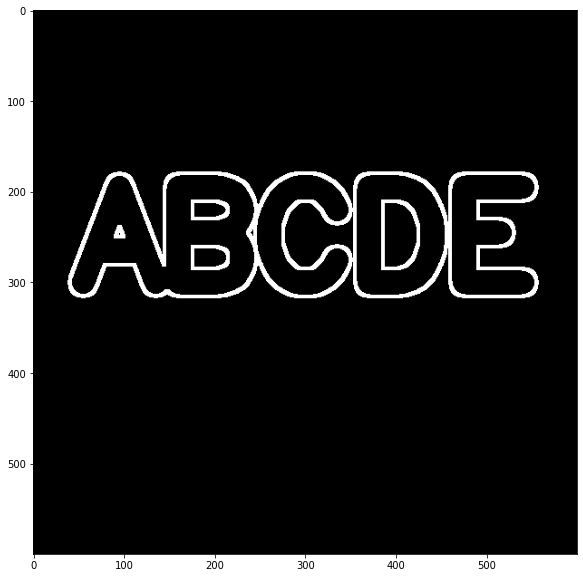

In [60]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)